In [1]:
import time
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timezone
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap

In [2]:
OAIC_df1  = pd.read_json('subject1_OAIC_S6_R9L1_1.json')
# OAIC_df2  = pd.read_json('subject1_OAIC_S6_R10L1_1.json')


In [3]:
OAIC_df1_shift = 0
OAIC_df2_shift = 0

#=====OAIC_GaitStep1=====#
OAIC_GaitStep_val = []
OAIC_GaitStep_ts=[]
# Convert to list
for i in range(len(OAIC_df1['GaitStep'][0])):
    OAIC_GaitStep_val.append(OAIC_df1['GaitStep'][0][i]['val'])
    OAIC_GaitStep_ts.append(OAIC_df1['GaitStep'][0][i]['ts'])
OAIC_GaitStep_df1 = pd.DataFrame(OAIC_GaitStep_val,columns=['RH','RK','RA','LH','LK','LA'])
OAIC_GaitStep_df1 = OAIC_GaitStep_df1.shift(OAIC_df1_shift)
OAIC_GaitStep_ts = np.array(OAIC_GaitStep_ts)
OAIC_GaitStep_ts = OAIC_GaitStep_ts - OAIC_GaitStep_ts[0]
OAIC_GaitStep_df1['ts'] = OAIC_GaitStep_ts
# print(OAIC_GaitStep_df1)

#=====OAIC_GaitStep2=====#
OAIC_GaitStep_val = []
OAIC_GaitStep_ts=[]
# Convert to list
for i in range(len(OAIC_df2['GaitStep'][0])):
    OAIC_GaitStep_val.append(OAIC_df2['GaitStep'][0][i]['val'])
    OAIC_GaitStep_ts.append(OAIC_df2['GaitStep'][0][i]['ts'])
OAIC_GaitStep_df2 = pd.DataFrame(OAIC_GaitStep_val,columns=['RH','RK','RA','LH','LK','LA'])
OAIC_GaitStep_df2 = OAIC_GaitStep_df2.shift(OAIC_df2_shift)
OAIC_GaitStep_ts = np.array(OAIC_GaitStep_ts)
OAIC_GaitStep_ts = OAIC_GaitStep_ts - OAIC_GaitStep_ts[0]
OAIC_GaitStep_df2['ts'] = OAIC_GaitStep_ts
# print(OAIC_GaitStep_df2)


In [4]:
window_slide = 300
#=====OAIC_JointAngle1=====#
OAIC_JointAngle_val = []
OAIC_JointAngle_ts=[]
# Convert to list
for i in range(len(OAIC_df1['JointAngle'][1])):
    OAIC_JointAngle_val.append(OAIC_df1['JointAngle'][1][i]['val'])
    OAIC_JointAngle_ts.append(OAIC_df1['JointAngle'][1][i]['ts'])
OAIC_JointAngle_df1 = pd.DataFrame(OAIC_JointAngle_val,columns=['RH','RK','RA','LH','LK','LA'])
OAIC_JointAngle_df1 = OAIC_JointAngle_df1.rolling(window=window_slide).mean()
OAIC_JointAngle_ts = np.array(OAIC_JointAngle_ts)
OAIC_JointAngle_ts = OAIC_JointAngle_ts - OAIC_JointAngle_ts[0]
OAIC_JointAngle_df1['ts'] = OAIC_JointAngle_ts
# print(OAIC_JointAngle_df1)


#=====OAIC_JointAngle2=====#
OAIC_JointAngle_val = []
OAIC_JointAngle_ts=[]
# Convert to list
for i in range(len(OAIC_df2['JointAngle'][1])):
    OAIC_JointAngle_val.append(OAIC_df2['JointAngle'][1][i]['val'])
    OAIC_JointAngle_ts.append(OAIC_df2['JointAngle'][1][i]['ts'])
OAIC_JointAngle_df2 = pd.DataFrame(OAIC_JointAngle_val,columns=['RH','RK','RA','LH','LK','LA'])
OAIC_JointAngle_df2 = OAIC_JointAngle_df2.rolling(window=window_slide).mean()
OAIC_JointAngle_df2 = OAIC_JointAngle_df2.shift(OAIC_df2_shift)
OAIC_JointAngle_ts = np.array(OAIC_JointAngle_ts)
OAIC_JointAngle_ts = OAIC_JointAngle_ts - OAIC_JointAngle_ts[0]
OAIC_JointAngle_df2['ts'] = OAIC_JointAngle_ts
# print(OAIC_JointAngle_df2)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
No handles with labels found to put in legend.
No handles with labels found to put in legend.


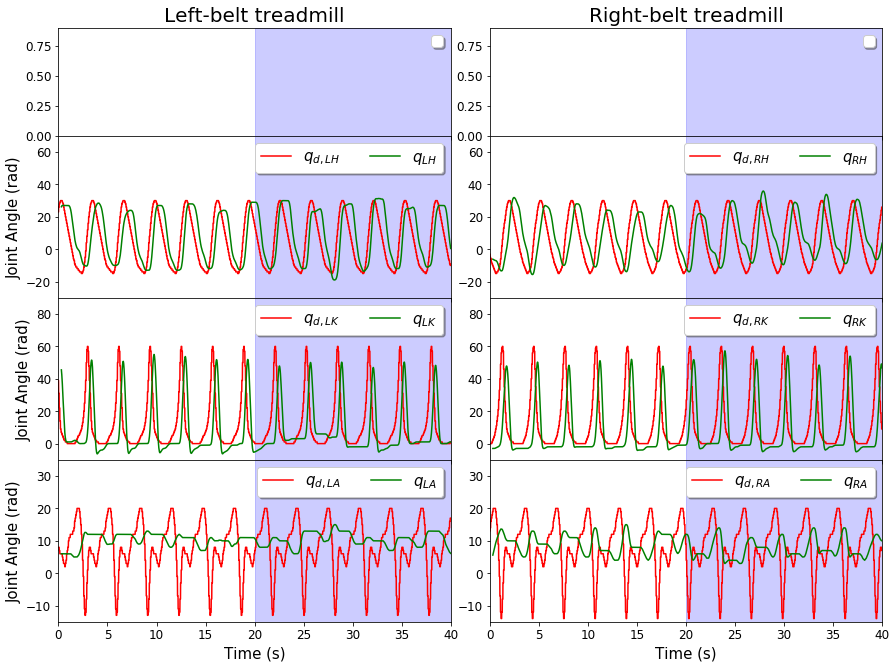

In [5]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"

fig = plt.figure(figsize=(13,11))


#====== Treadmill Plot ======
ax = np.zeros((4,2), dtype=object)
gs0 = GridSpec(4, 2, left=0.07, right=0.95,top=0.95,bottom=0.2, wspace=0.1,hspace=0.0,height_ratios=[2,3,3,3])
ax[0,0] = fig.add_subplot(gs0[0:1, 0:1])
ax[0,1] = fig.add_subplot(gs0[0:1, 1:2])

ax[0,0].set_title("Left-belt treadmill")
ax[0,1].set_title("Right-belt treadmill")
ax[0,0].title.set_fontsize(20)
ax[0,1].title.set_fontsize(20)

# ax[0,0].plot(treadmill_spd_df['ts'],treadmill_spd_df['left'],  label='Left treadmill speed',color='magenta')
# ax[0,1].plot(treadmill_spd_df['ts'],treadmill_spd_df['right'], label='Right treadmill speed',color='magenta')

ax[0,0].set_ylim(0,0.9)
ax[0,1].set_ylim(0,0.9)
ax[0,0].set_xlim(0,40)
ax[0,1].set_xlim(0,40)

#====== Joint Plot ======
ax[1,0] = fig.add_subplot(gs0[1:2, 0:1])
ax[2,0] = fig.add_subplot(gs0[2:3, 0:1], sharex=ax[1,0])
ax[3,0] = fig.add_subplot(gs0[3:4, 0:1], sharex=ax[1,0])

ax[1,1] = fig.add_subplot(gs0[1:2, 1:2])
ax[2,1] = fig.add_subplot(gs0[2:3, 1:2], sharex=ax[1,0])
ax[3,1] = fig.add_subplot(gs0[3:4, 1:2], sharex=ax[1,0])

plt.setp(ax[0,0].get_xticklabels(), visible=False)
plt.setp(ax[0,1].get_xticklabels(), visible=False)
plt.setp(ax[1,0].get_xticklabels(), visible=False)
plt.setp(ax[2,0].get_xticklabels(), visible=False)
plt.setp(ax[1,1].get_xticklabels(), visible=False)
plt.setp(ax[2,1].get_xticklabels(), visible=False)
ax[3,0].set_xlabel('Time (s)')
ax[3,1].set_xlabel('Time (s)')


#========================================
# ax[1,0].set_title("Left Hip Joint (LH)")
# ax[1,1].set_title("Right Hip Joont (RH)")
ax[1,0].title.set_fontsize(15)
ax[1,1].title.set_fontsize(15)


ax[1,0].set_ylabel('Joint Angle (rad)')
ax[1,0].plot(OAIC_GaitStep_df1['ts'],OAIC_GaitStep_df1['LH'].astype(float),label='$q_{d,LH}$',color='red')
ax[1,1].plot(OAIC_GaitStep_df1['ts'],OAIC_GaitStep_df1['RH'].astype(float),label='$q_{d,RH}$',color='red')
ax[1,0].plot(OAIC_JointAngle_df1['ts'],OAIC_JointAngle_df1['LH'],label='$q_{LH}$',color='green')
ax[1,1].plot(OAIC_JointAngle_df1['ts'],OAIC_JointAngle_df1['RH'],label='$q_{RH}$',color='green')


ax[1,0].set_xlim(0,40)
ax[1,1].set_xlim(0,40)
ax[1,0].set_ylim(-30,70)
ax[1,1].set_ylim(-30,70)


#========================================
# ax[2,0].set_title("Left Knee Joint (LK)")
# ax[2,1].set_title("Right Knee Joint (RK) ")
ax[2,0].title.set_fontsize(15)
ax[2,1].title.set_fontsize(15)


ax[2,0].set_ylabel('Joint Angle (rad)')
ax[2,1].plot(OAIC_GaitStep_df1['ts'],OAIC_GaitStep_df1['RK'].astype(float),label='$q_{d,RK}$',color='red')
ax[2,0].plot(OAIC_GaitStep_df1['ts'],OAIC_GaitStep_df1['LK'].astype(float),label='$q_{d,LK}$',color='red')
ax[2,1].plot(OAIC_JointAngle_df1['ts'],OAIC_JointAngle_df1['RK'],label='$q_{RK}$',color='green')
ax[2,0].plot(OAIC_JointAngle_df1['ts'],OAIC_JointAngle_df1['LK'],label='$q_{LK}$',color='green')


ax[2,0].set_xlim(0,40)
ax[2,1].set_xlim(0,40)
ax[2,0].set_ylim(-10,90)
ax[2,1].set_ylim(-10,90)


#========================================
# ax[3,0].set_title("Left Ankle Joint (LA)")
# ax[3,1].set_title("Right KneAnklee Joint (RA)")
ax[3,0].title.set_fontsize(15)
ax[3,1].title.set_fontsize(15)

ax[3,0].set_ylabel('Joint Angle (rad)')
ax[3,1].plot(OAIC_GaitStep_df1['ts'],OAIC_GaitStep_df1['RA'].astype(float),label='$q_{d,RA}$',color='red')
ax[3,0].plot(OAIC_GaitStep_df1['ts'],OAIC_GaitStep_df1['LA'].astype(float),label='$q_{d,LA}$',color='red')
ax[3,1].plot(OAIC_JointAngle_df1['ts'],OAIC_JointAngle_df1['RA'],label='$q_{RA}$',color='green')
ax[3,0].plot(OAIC_JointAngle_df1['ts'],OAIC_JointAngle_df1['LA'],label='$q_{LA}$',color='green')


ax[3,0].set_xlim(0,40)
ax[3,1].set_xlim(0,40)
ax[3,0].set_ylim(-15,35)
ax[3,1].set_ylim(-15,35)



cmap = ListedColormap(['white','blue'])
ax[0,0].axvspan(20, 40, alpha=0.2, color=cmap.colors[1])
ax[1,0].axvspan(20, 40, alpha=0.2, color=cmap.colors[1])
ax[2,0].axvspan(20, 40, alpha=0.2, color=cmap.colors[1])
ax[3,0].axvspan(20, 40, alpha=0.2, color=cmap.colors[1])
ax[0,1].axvspan(20, 40, alpha=0.2, color=cmap.colors[1])
ax[1,1].axvspan(20, 40, alpha=0.2, color=cmap.colors[1])
ax[2,1].axvspan(20, 40, alpha=0.2, color=cmap.colors[1])
ax[3,1].axvspan(20, 40, alpha=0.2, color=cmap.colors[1])

ax[0,0].legend(fancybox=True, shadow=True, ncol=2,loc="upper right")
ax[1,0].legend(fancybox=True, shadow=True, ncol=2,loc="upper right")
ax[2,0].legend(fancybox=True, shadow=True, ncol=2,loc="upper right")
ax[3,0].legend(fancybox=True, shadow=True, ncol=2,loc="upper right")
ax[0,1].legend(fancybox=True, shadow=True, ncol=2,loc="upper right")
ax[1,1].legend(fancybox=True, shadow=True, ncol=2,loc="upper right")
ax[2,1].legend(fancybox=True, shadow=True, ncol=2,loc="upper right")
ax[3,1].legend(fancybox=True, shadow=True, ncol=2,loc="upper right")

# plt.savefig("OAIC_JointAngles.pdf")